<a href="https://colab.research.google.com/github/crestrepoz/Master-s-Degree-in-Data-Science/blob/main/Breast_Cancer_Wisconsin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ucimlrepo

In [1]:
# Carga de librerías y lectura del archivo que contiene los datos

import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# De acuerdo con lo indicado, la plataforma donde está almacenada la base de datos, entrega el código para cargar la
# información de la base de datos a la libreria

from ucimlrepo import fetch_ucirepo

# fetch dataset
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)

# data (as pandas dataframes)
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets

# metadata
print(breast_cancer_wisconsin_original.metadata)

# variable information
print(breast_cancer_wisconsin_original.variables)


{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, having been removed fro

In [5]:
# Concatenar la información de las variables almacenadas en X y y en un mismo dataframe
breast_cancer = pd.concat([X, y], axis=1)

# Mostrar inf df
display(breast_cancer.head())

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


# **Database Description**

In [6]:
#Cuál es el número de registros?
#Cuál es el número de atributos?

shape = breast_cancer.shape
shape

(699, 10)

In [7]:
#Cual es el tipo de los atributos?
breast_cancer.dtypes

,0
Clump_thickness,int64
Uniformity_of_cell_size,int64
Uniformity_of_cell_shape,int64
Marginal_adhesion,int64
Single_epithelial_cell_size,int64
Bare_nuclei,float64
Bland_chromatin,int64
Normal_nucleoli,int64
Mitoses,int64
Class,int64


In [8]:
#Medida de centralidad y desviación para atributos numéricos:
breast_cancer.describe()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


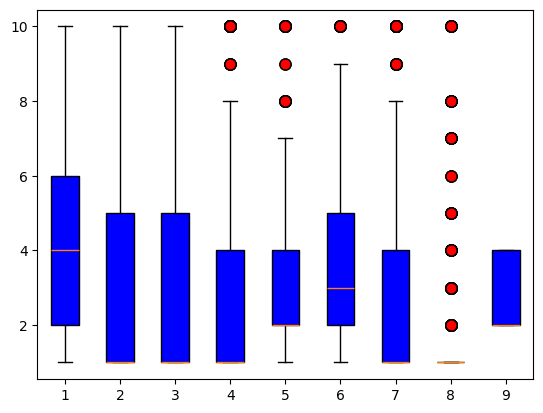

In [13]:
# Diagrama de cajas y bigotes para atributos numéricos
# Permite identificar la existencia de datos atípicos

plt.boxplot((breast_cancer['Clump_thickness'],breast_cancer['Uniformity_of_cell_size'],
            breast_cancer['Uniformity_of_cell_shape'],breast_cancer['Marginal_adhesion'],
             breast_cancer['Single_epithelial_cell_size'], breast_cancer['Bland_chromatin'], breast_cancer['Normal_nucleoli']
             ,breast_cancer['Mitoses'],breast_cancer['Class']),
            patch_artist=True, # Enable filling boxes with color
            boxprops=dict(facecolor='blue'), # Set box color
            flierprops=dict(marker='o', markerfacecolor='red', markersize=8,
                          linestyle='none')) # Set outlier marker style
plt.show()

In [15]:
#Medida de centralidad para atributos categóricos:
breast_cancer.mode()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,1,1,1,1,2,1.0,2,1,1,2


In [16]:
# Calcular matriz de correlaciones (redondeada a 2 decimales)
correlaciones = breast_cancer.corr().round(2)

# Mostrar en consola
print(correlaciones.to_string())

                             Clump_thickness  Uniformity_of_cell_size  Uniformity_of_cell_shape  Marginal_adhesion  Single_epithelial_cell_size  Bare_nuclei  Bland_chromatin  Normal_nucleoli  Mitoses  Class
Clump_thickness                         1.00                     0.64                      0.65               0.49                         0.52         0.59             0.56             0.54     0.35   0.72
Uniformity_of_cell_size                 0.64                     1.00                      0.91               0.71                         0.75         0.69             0.76             0.72     0.46   0.82
Uniformity_of_cell_shape                0.65                     0.91                      1.00               0.68                         0.72         0.71             0.74             0.72     0.44   0.82
Marginal_adhesion                       0.49                     0.71                      0.68               1.00                         0.60         0.67             0.6

In [19]:
# Cual es el máximo de datos faltantes en un mismo registro?
# Si hay registros a los que les faltan muchos valores, es mejor eliminarlos.
max(breast_cancer.isnull().sum(axis=1))

1

In [20]:
#Cuantos datos faltantes hay por cada atributo?
breast_cancer.isnull().sum()

,0
Clump_thickness,0
Uniformity_of_cell_size,0
Uniformity_of_cell_shape,0
Marginal_adhesion,0
Single_epithelial_cell_size,0
Bare_nuclei,16
Bland_chromatin,0
Normal_nucleoli,0
Mitoses,0
Class,0


In [32]:
breast_cancer.columns

Index(['Clump_thickness', 'Uniformity_of_cell_size',
       'Uniformity_of_cell_shape', 'Marginal_adhesion',
       'Single_epithelial_cell_size', 'Bare_nuclei', 'Bland_chromatin',
       'Normal_nucleoli', 'Mitoses', 'Class'],
      dtype='object')

# **Data Preparation**

In [24]:
# Calcular la mediana de la variable Bare_nuclei excluyendo datos nulos
median_bare_nuclei = breast_cancer['Bare_nuclei'].median()

# Reemplace los valores faltantes (NaN) en la columna 'Bare_nuclei' con la mediana calculada
breast_cancer["Bare_nuclei"] = breast_cancer["Bare_nuclei"].fillna(median_bare_nuclei)

breast_cancer.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [25]:
from sklearn.preprocessing import LabelEncoder

# Se convierten los atributos categóricos a valores numéricos
labelencoder= LabelEncoder()
breast_cancer['Bare_nuclei'] = labelencoder.fit_transform(breast_cancer['Bare_nuclei'])
breast_cancer.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,9,3,2,1,2
2,3,1,1,1,2,1,3,1,1,2
3,6,8,8,1,3,3,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2


In [26]:
from sklearn import preprocessing

# Se normaliza el atributo seleccionado
breast_cancer['Bare_nuclei'] = preprocessing.scale(breast_cancer['Bare_nuclei'])
breast_cancer.head()

,Clump_thickness,Uniformity_of_cell_size,Uniformity_of_cell_shape,Marginal_adhesion,Single_epithelial_cell_size,Bare_nuclei,Bland_chromatin,Normal_nucleoli,Mitoses,Class
0,5,1,1,1,2,-0.686979,3,1,1,2
1,5,4,4,5,7,1.799664,3,2,1,2
2,3,1,1,1,2,-0.410685,3,1,1,2
3,6,8,8,1,3,0.141902,3,7,1,2
4,4,1,1,3,2,-0.686979,3,1,1,2


In [29]:
breast_cancer.groupby("Class").size()

#De acuerdo con  el resultado de esta revisión se toma la decisión de balancear o no la base de datos

,0
Class,
2,458
4,241


# **Modeling**

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [33]:
#Variables predictoras y objetivo
X = breast_cancer.drop("Class", axis=1)
y = breast_cancer["Class"]

# Convertir a binario: 2 -> 0 (benigno), 4 -> 1 (maligno)
y = y.map({2:0, 4:1})

# 4. División 60/40
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [34]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(419, 9) (419,)
(280, 9) (280,)


In [36]:
# Dividir el conjunto de datos en conjuntos de entrenamiento y test
logisticRegr = LogisticRegression(solver="lbfgs", max_iter=1000)
# lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno) es el default recomendado para problemas de clasificación multiclase y funciona bien con datasets medianos
# tol Es la tolerancia de convergencia, Preguntar en que casos se usa?????
logisticRegr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [37]:
# Aplicación del modelo construido a los datos de test
predictions = logisticRegr.predict(X_test)
predictions

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])

In [39]:
accuracyreg = accuracy_score(y_test, predictions)
print("Accuracy:", round(accuracyreg, 5))

Accuracy: 0.96786


De acuerdo con la revisión del modelo, se pudo evidenciar que este podría acertar aproximadamente el 96.8% de los casos al predecir si un tumor es benigno o maligno de acuerdo con la base de datos entregada; lo que quiere decir que, de cada 100 pacientes mujeres con posible cancer de mama, el modelo clasificó  correctamente a 97 de los casos de estas mujeres.